In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import classification_report, precision_recall_fscore_support
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [5]:
data = pd.read_csv('dataset/heart.csv')
# data = pd.read_csv('dataset/heart2.csv')
print(data.head)
print(data.columns)  

<bound method NDFrame.head of      Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA      140.0        289.0          0     Normal   
1     49   F           NAP      160.0        180.0          0     Normal   
2     37   M           ATA      130.0        283.0          0         ST   
3     48   F           ASY      138.0        214.0          0     Normal   
4     54   M           NAP      150.0        195.0          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
914   68   M           ASY      144.0        193.0          1     Normal   
915   57   M           ASY      130.0        131.0          0     Normal   
916   57   F           ATA      130.0        236.0          0        LVH   
917   38   M           NAP      138.0        175.0          0     Normal   
918   52   M            TA      145.0        155.0          1         ST   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease

In [6]:
for column in data.columns:
    if data[column].dtype == 'object':
        print(column, data[column].unique())

Sex ['M' 'F']
ChestPainType ['ATA' 'NAP' 'ASY' 'TA']
RestingECG ['Normal' 'ST' 'LVH']
ExerciseAngina ['N' 'Y']
ST_Slope ['Up' 'Flat' 'Down']


In [7]:
stats = data.describe()
print(stats)

              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  919.000000  919.000000   919.000000  919.000000  919.000000   
mean    53.509249  132.410229   198.751904    0.233950  136.829162   
std      9.427609   18.508737   109.334098    0.423571   25.453537   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.000000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  919.000000    919.000000  
mean     0.887486      0.553863  
std      1.065996      0.497361  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  


In [8]:
data_encoded = pd.get_dummies(data, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])
X = data_encoded.drop('HeartDisease', axis=1) 
y = data_encoded['HeartDisease'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

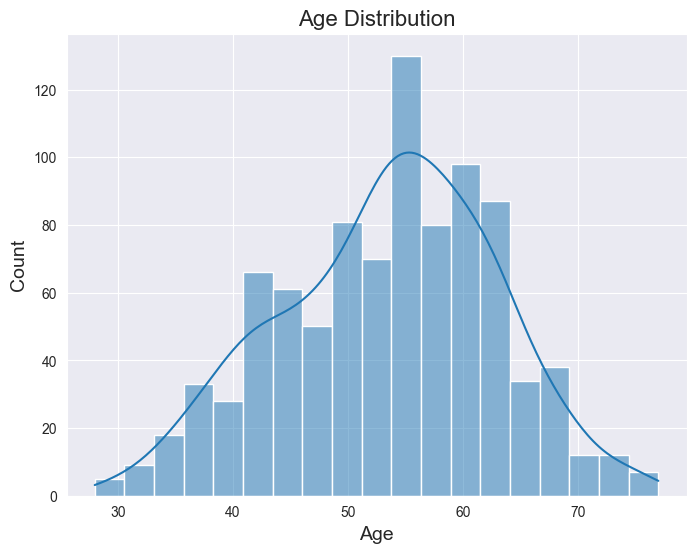

In [9]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], kde=True)
plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

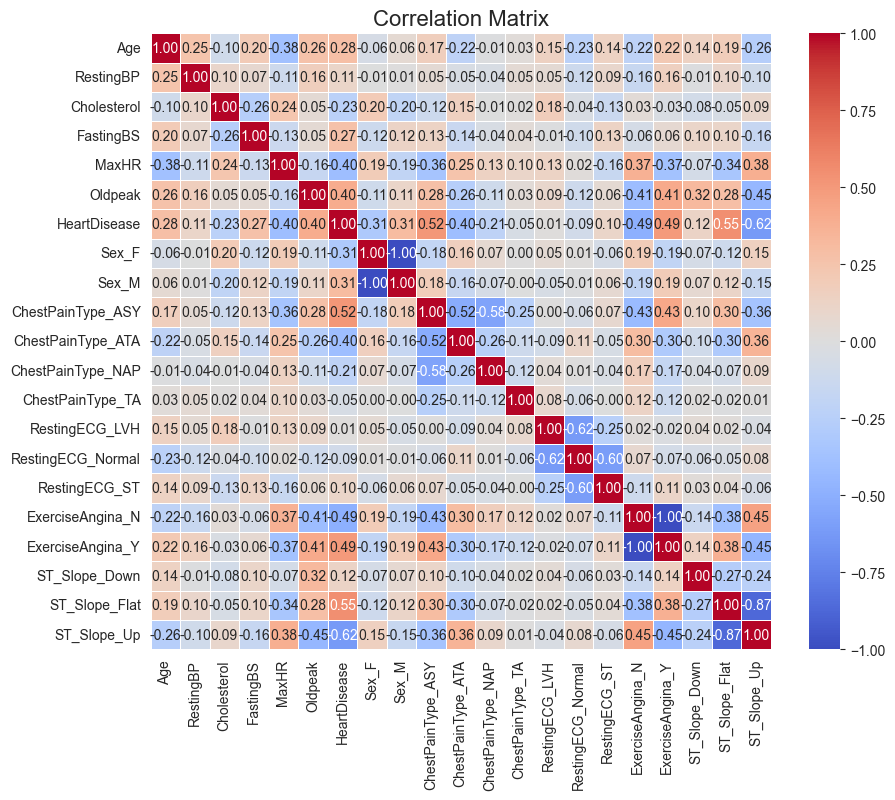

In [10]:
correlation_matrix = data_encoded.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

Random Forrest Model

In [11]:
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

y_pred = random_forest_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

report = classification_report(y_test, y_pred, output_dict=True)
    
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 89.13043478260869

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87        73
           1       0.93      0.89      0.91       111

    accuracy                           0.89       184
   macro avg       0.88      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184


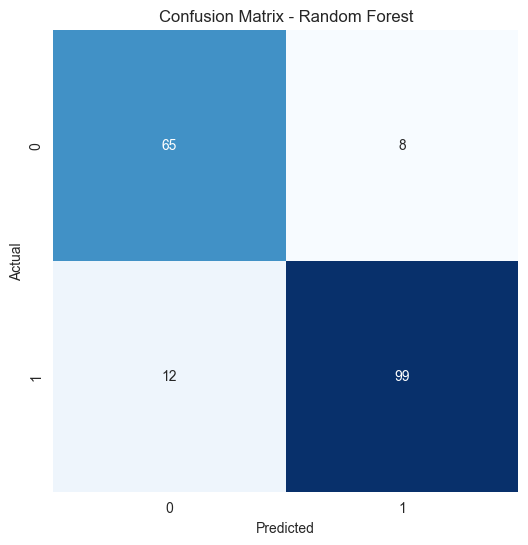

In [12]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

plot_confusion_matrix(y_test, y_pred, 'Random Forest')

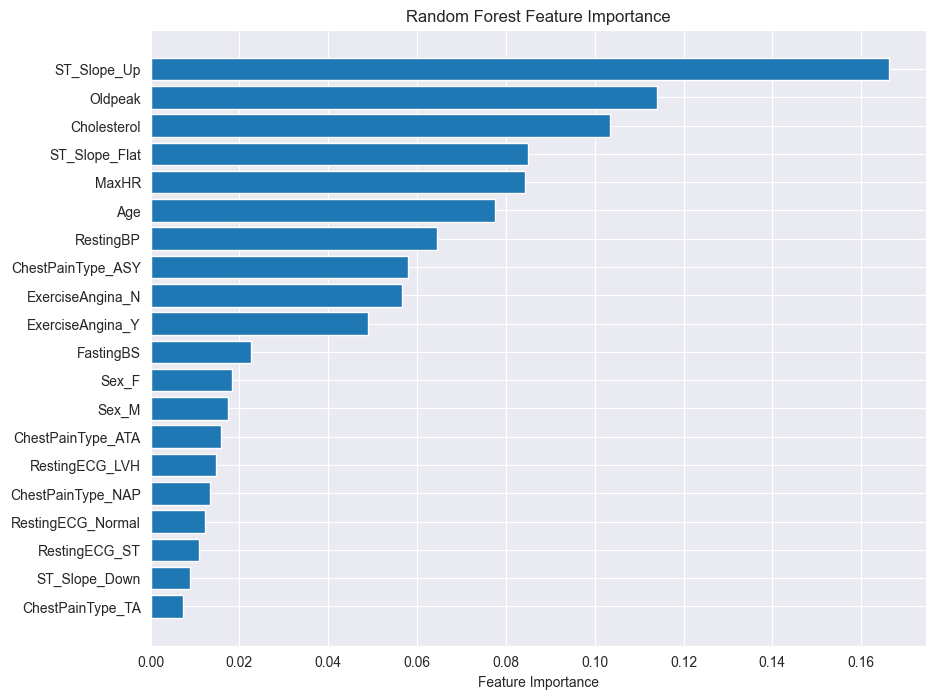

In [13]:
feature_importance = random_forest_model.feature_importances_

feature_names = X.columns

sorted_idx = feature_importance.argsort()

plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()

KNN Model

In [14]:
knn_model = KNeighborsClassifier(n_neighbors=5)  
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Model Accuracy:", accuracy_knn*100)

print("\nClassification Report for KNN Model:")
print(classification_report(y_test, y_pred_knn))


KNN Model Accuracy: 70.1086956521739

Classification Report for KNN Model:
              precision    recall  f1-score   support

           0       0.60      0.73      0.66        73
           1       0.79      0.68      0.73       111

    accuracy                           0.70       184
   macro avg       0.70      0.71      0.70       184
weighted avg       0.72      0.70      0.70       184


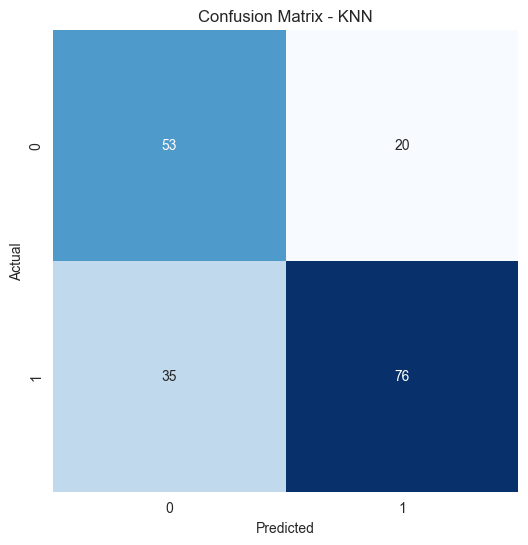

In [15]:
plot_confusion_matrix(y_test, y_pred_knn, 'KNN')

In [16]:
logistic_regression_model = LogisticRegression(solver='sag')
logistic_regression_model.fit(X_train, y_train)
y_pred_logistic = logistic_regression_model.predict(X_test)

accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("Logistic Regression Model Accuracy:", accuracy_logistic)

print("\nClassification Report for Logistic Regression Model:")
print(classification_report(y_test, y_pred_logistic))


Logistic Regression Model Accuracy: 0.6902173913043478

Classification Report for Logistic Regression Model:
              precision    recall  f1-score   support

           0       0.60      0.66      0.63        73
           1       0.76      0.71      0.73       111

    accuracy                           0.69       184
   macro avg       0.68      0.68      0.68       184
weighted avg       0.70      0.69      0.69       184


D:\Users\devch\Documents\SML_PROJECT\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


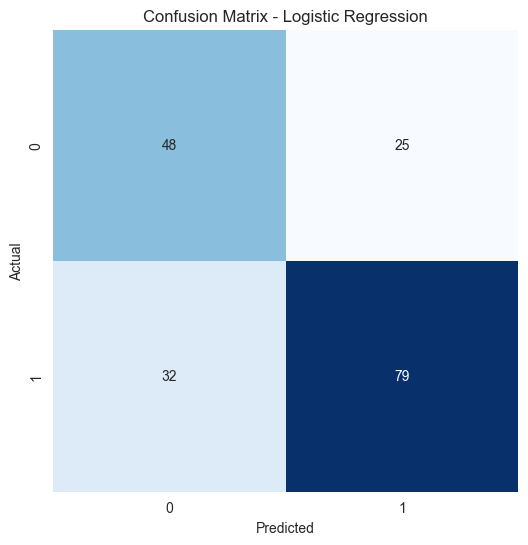

In [17]:
plot_confusion_matrix(y_test, y_pred_logistic, 'Logistic Regression')

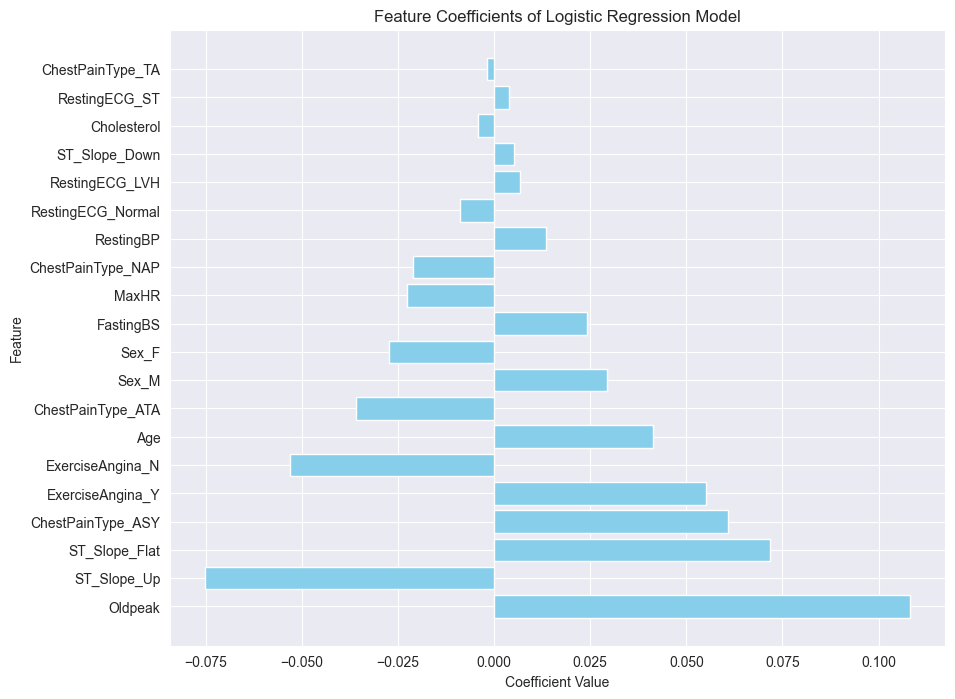

In [18]:
# Get feature coefficients and their corresponding names
feature_coefficients = logistic_regression_model.coef_[0]
feature_names = X.columns

# Create a DataFrame to store feature coefficients and their names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': feature_coefficients})

# Sort the coefficients by their absolute values for better visualization
coefficients_df['Abs_Coefficient'] = abs(coefficients_df['Coefficient'])
coefficients_df = coefficients_df.sort_values(by='Abs_Coefficient', ascending=False)

# Plot feature coefficients
plt.figure(figsize=(10, 8))
plt.barh(coefficients_df['Feature'], coefficients_df['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Coefficients of Logistic Regression Model')
plt.show()


In [19]:
one_hot_features = pd.get_dummies(data[['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']], 
                                  columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']).columns

def predict_and_update_csv(input_data):
    input_df = pd.DataFrame([input_data], columns=data.columns[:-1])
    # Encode categorical variables
    input_df = pd.get_dummies(input_df, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])
    for feature in one_hot_features:
        if feature not in input_df.columns:
            input_df[feature] = 0

    input_df = input_df[X_train.columns]
    prediction = random_forest_model.predict(input_df)[0]
    if (prediction == 1):
        print("You have high chances of having heart disease please consult yout cardiologist soon !")
    else:
        print("You are healthy and safe !")
    input_data['HeartDisease'] = prediction
    data_with_input = pd.concat([data, pd.DataFrame([input_data])], ignore_index=True)
    data_with_input.to_csv('dataset/heart.csv', index=False)

def user_interface():
    while True:
        input_data = {}
        input_data['Age'] = int(input("Enter Age: "))
        input_data['Sex'] = input("Enter Sex (M/F): ")
        input_data['ChestPainType'] = input("Enter Chest Pain Type (ASY/ATA/NAP/TA): ")
        input_data['RestingBP'] = float(input("Enter Resting Blood Pressure: "))
        input_data['Cholesterol'] = float(input("Enter Cholesterol Level: "))
        input_data['FastingBS'] = int(input("Enter Fasting Blood Sugar (1/0): "))
        input_data['RestingECG'] = input("Enter Resting ECG (Normal/LVH/ST): ")
        input_data['MaxHR'] = float(input("Enter Maximum Heart Rate Achieved: "))
        input_data['ExerciseAngina'] = input("Enter Exercise Induced Angina (Y/N): ")
        input_data['Oldpeak'] = float(input("Enter Oldpeak: "))
        input_data['ST_Slope'] = input("Enter ST Slope (Flat/Down/Up): ")
        
        predict_and_update_csv(input_data)
        
        print("Prediction and data update successful!")
        choice = input("Do you want to enter more data? (yes/no): ")
        if choice.lower() != 'yes':
            break

if __name__ == "__main__":
    user_interface()


You have high chances of having heart disease please consult yout cardiologist soon !
Prediction and data update successful!
